In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_montecarlo as mc
import missingno as msno

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [3]:
len(train),len(test),len(gender_submission)

(891, 418, 418)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().values.any()

True

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

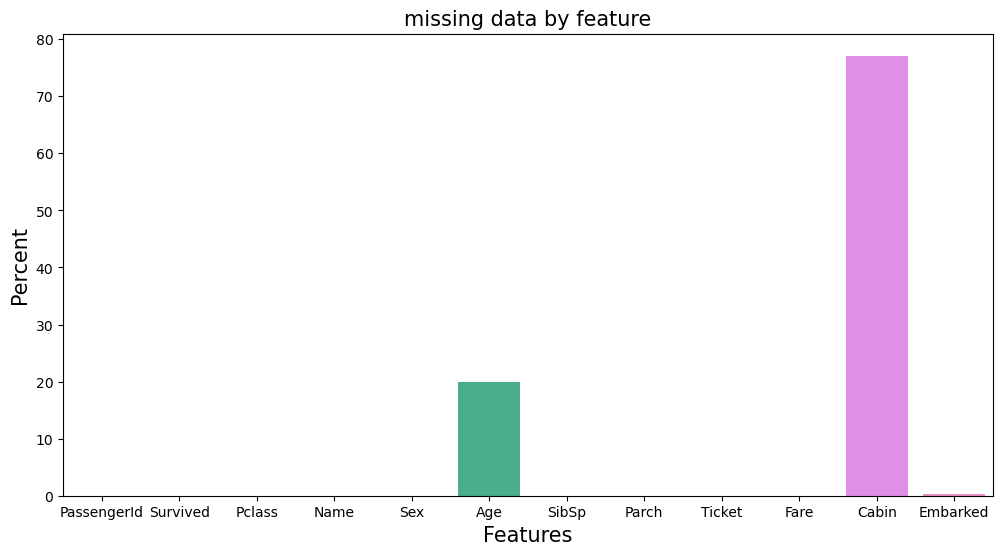

In [11]:
plt.style.use('default')
total=train.isnull().sum()
percent=train.isnull().sum()/train.isnull().count()*100
missing_data=pd.concat([total,percent],axis=1, keys=['total', 'percent'])
#missing_data.sort_values(ascending=False)
ax = plt.subplots(figsize=(12, 6))
#plt.xticks(rotation='90')
sns.barplot(x=missing_data.index,y=missing_data['percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.title('missing data by feature', fontsize=15)
plt.show()

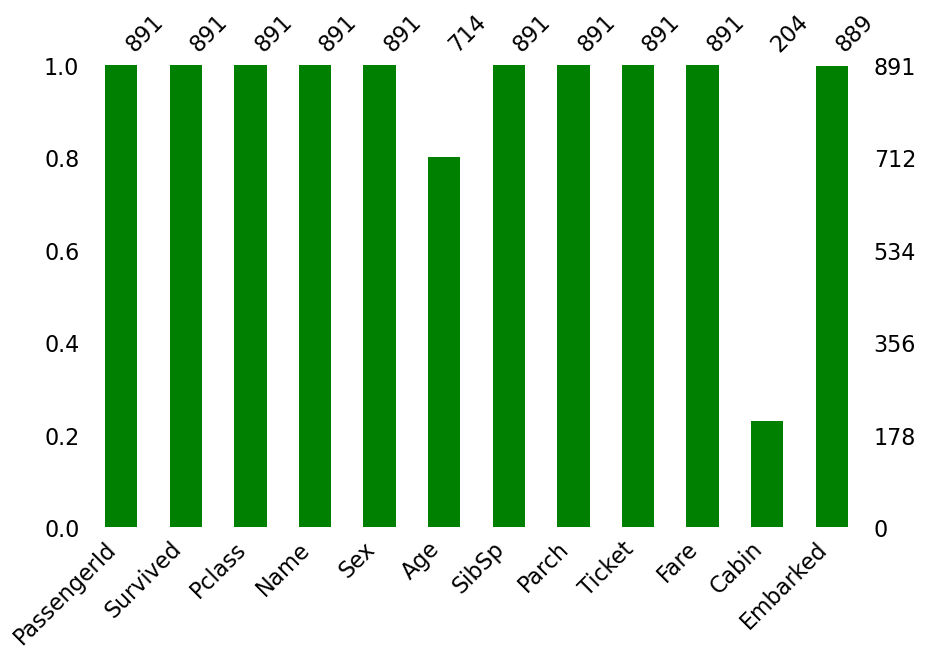

In [12]:
msno.bar(train,figsize=(10,6),color="green")
plt.show()

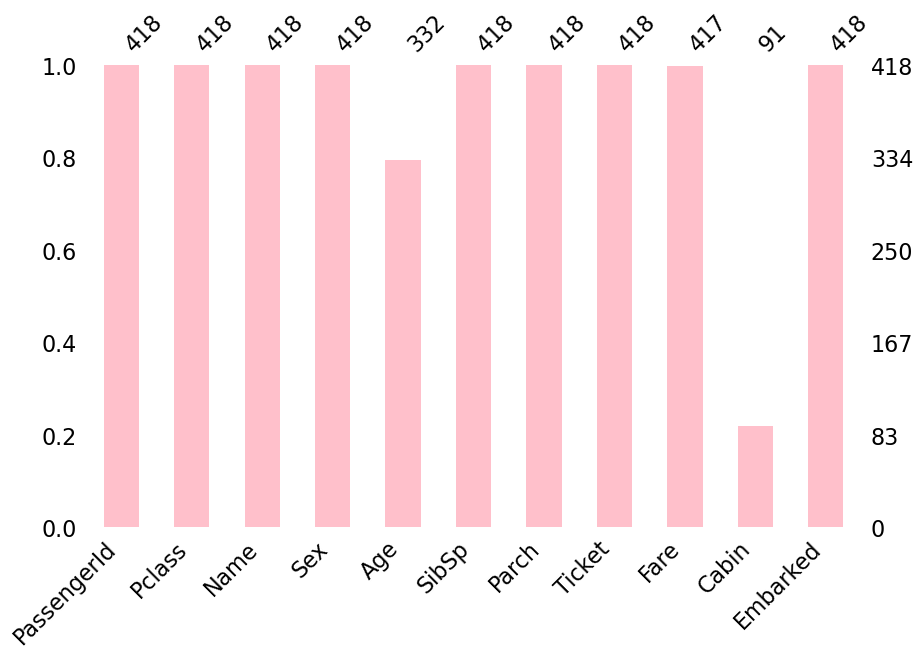

In [13]:
msno.bar(test,figsize=(10,6),color="pink")
plt.show()

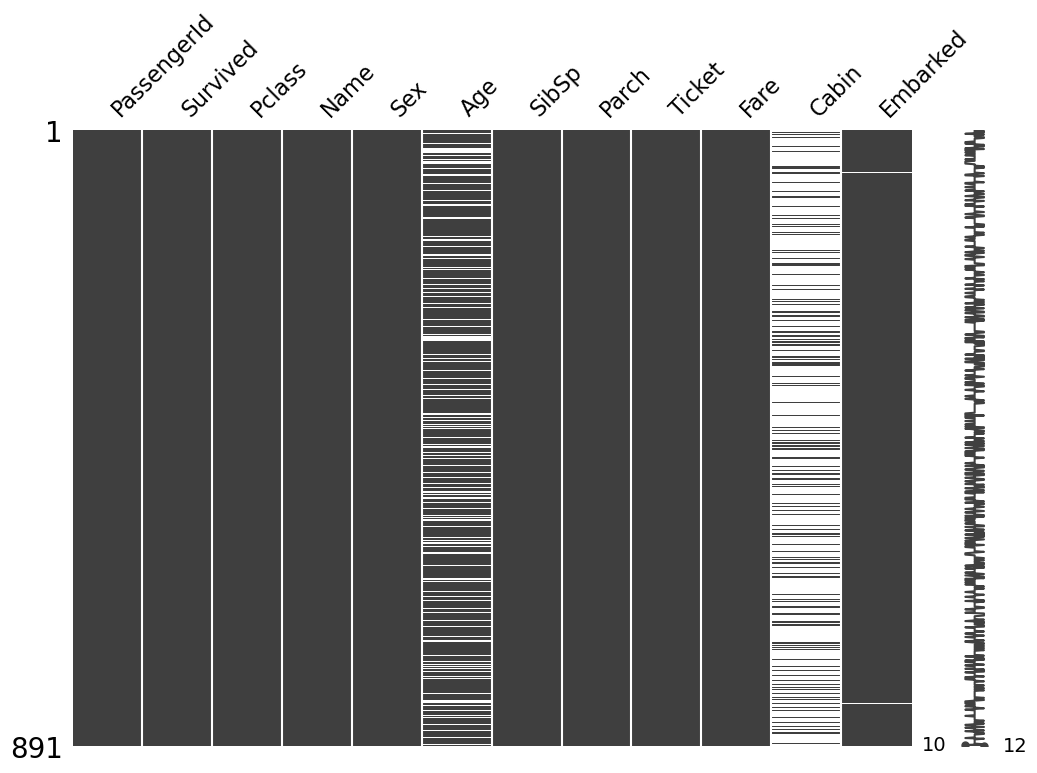

In [14]:
msno.matrix(train,figsize=(12,8))
plt.show()

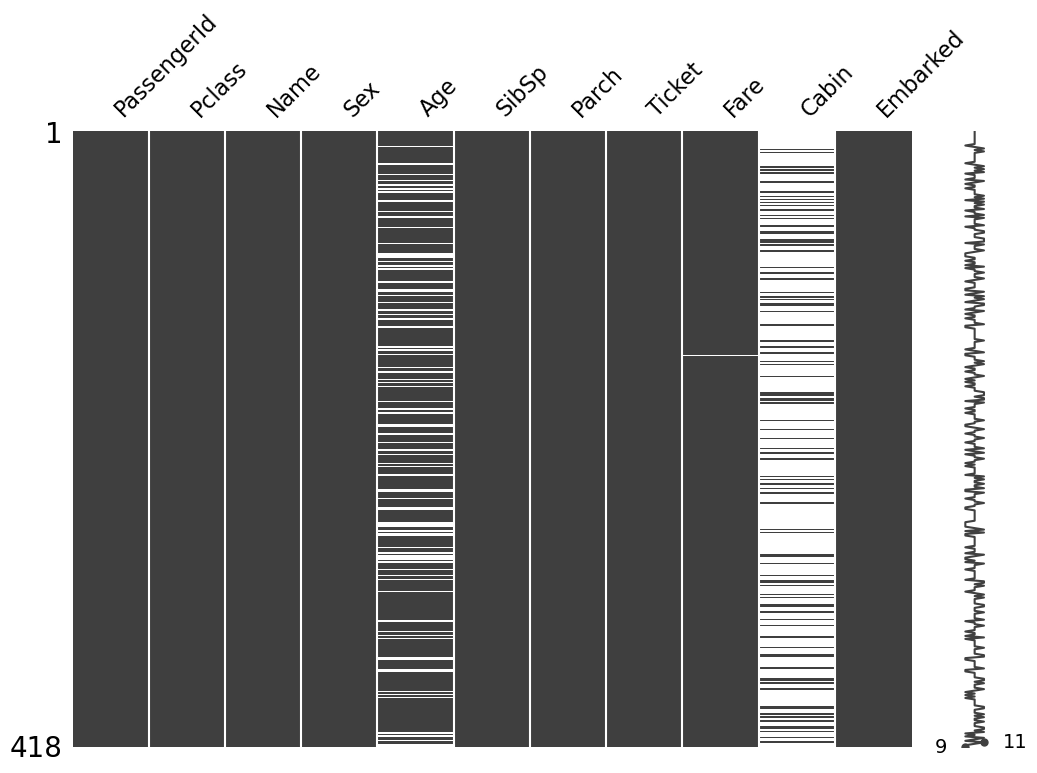

In [15]:
msno.matrix(test,figsize=(12,8))
plt.show()

In [16]:
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Age'].fillna(train['Age'].median(),inplace=True)

In [17]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
train['Cabin'].fillna('Unknown',inplace=True)
train['Embarked'].fillna('Unknown',inplace=True)
test['Cabin'].fillna('Unknown',inplace=True)
test['Fare'].fillna(train['Fare'].median(),inplace=True)

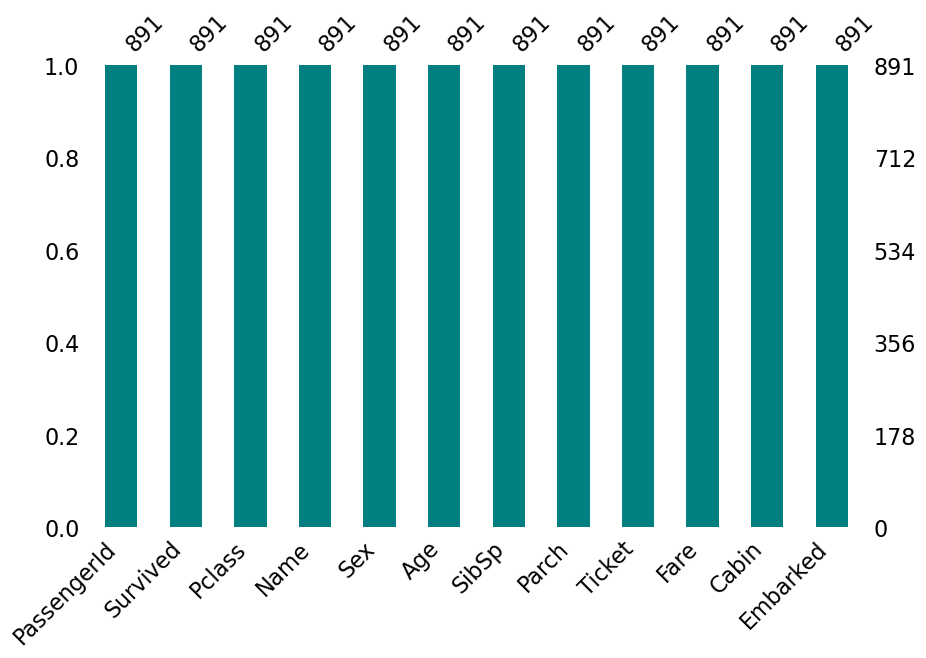

In [20]:
msno.bar(train,figsize=(10,6),color="teal")
plt.show()

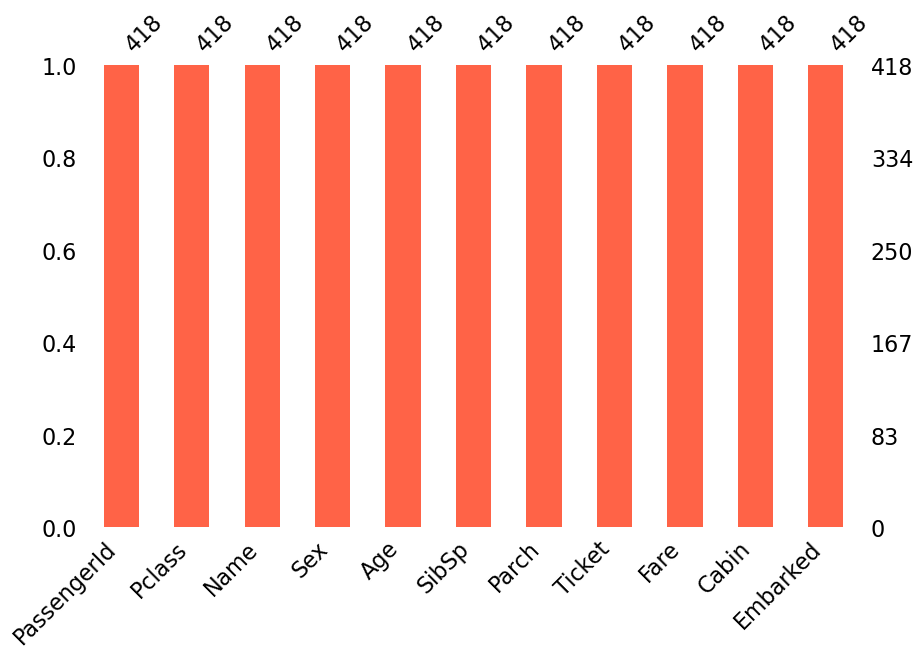

In [21]:
msno.bar(test,figsize=(10,6),color="tomato")
plt.show()

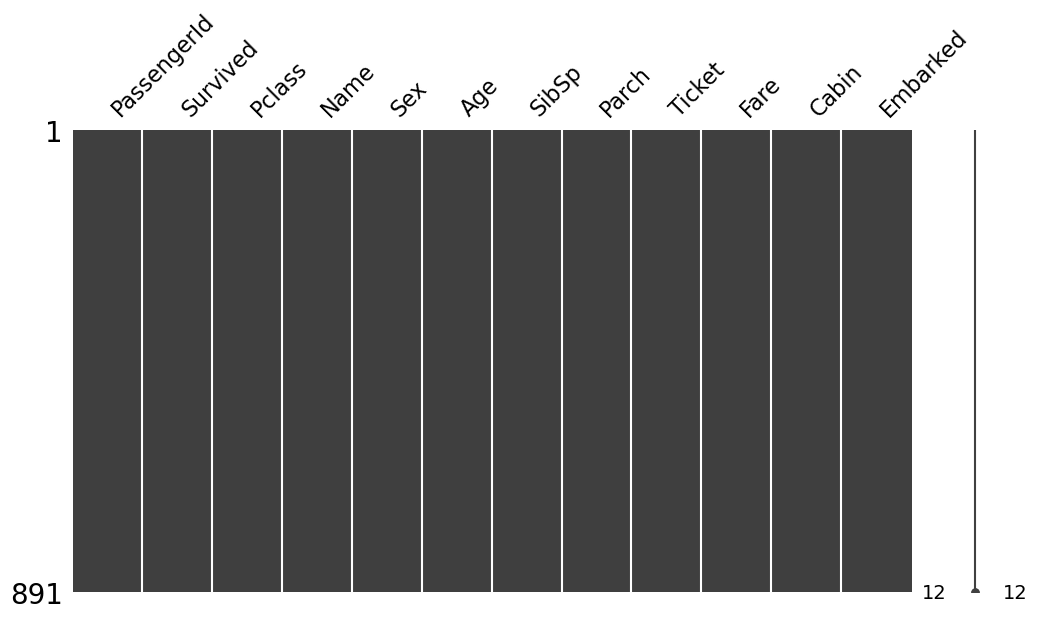

In [22]:
msno.matrix(train,figsize=(12,6))
plt.show()

In [23]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

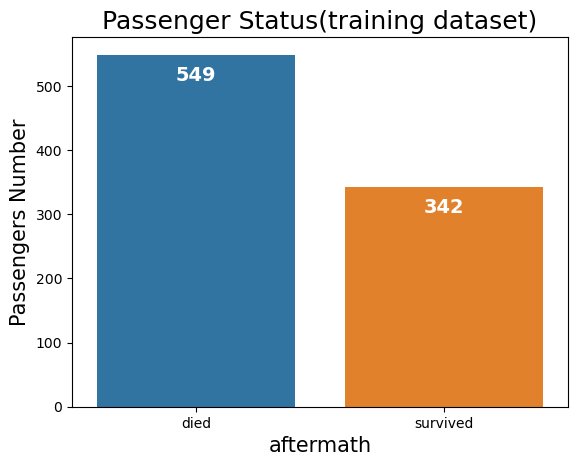

In [24]:
sns.countplot(x='Survived',data=train)
plt.xticks( np.arange(2), ['died', 'survived'] )
plt.title('Passenger Status(training dataset)',fontsize= 18)
plt.xlabel('aftermath',fontsize = 15)
plt.ylabel('Passengers Number',fontsize = 15)
labels = (train['Survived'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

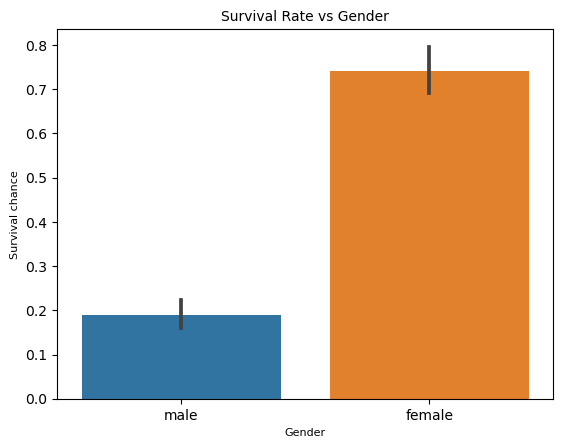

In [25]:
sns.barplot(x = "Sex", y = "Survived", data=train)
plt.title("Survival Rate vs Gender", fontsize =10)
labels = ['Male', 'Female']
plt.ylabel("Survival chance", fontsize = 8)
plt.xlabel("Gender",fontsize = 8)
plt.show()

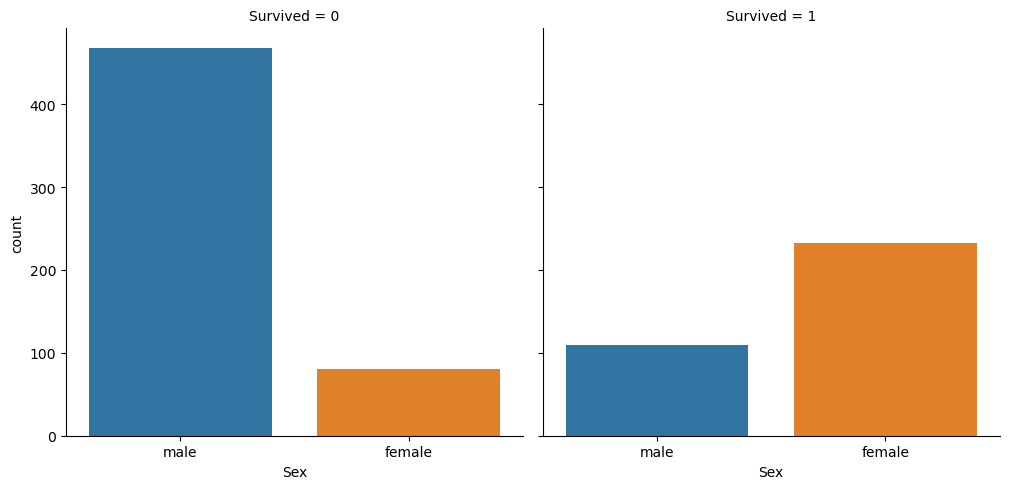

In [26]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train)

plt.show()

In [27]:
train.groupby(['Survived','Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   81     81     81      81    81   
         male            468     468   468  468    468    468     468   468   
1        female          233     233   233  233    233    233     233   233   
         male            109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female     81        81  
         male      468       468  
1        female    233       233  
         male      109       109

In [28]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

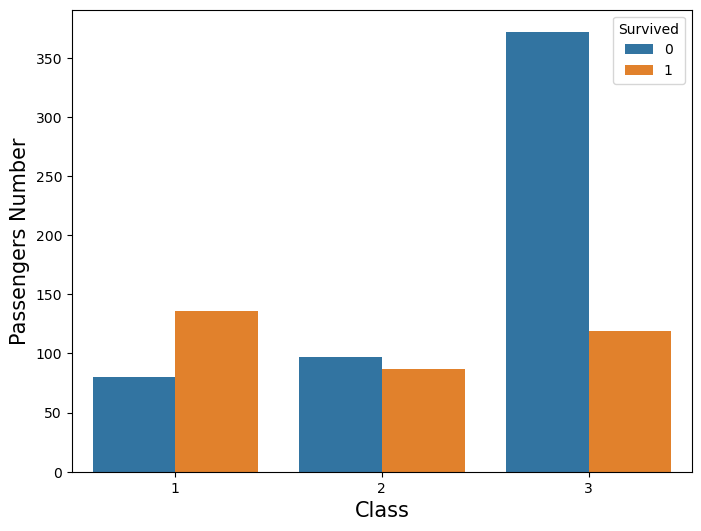

In [29]:
plt.subplots(figsize = (8,6))
sns.countplot('Pclass',hue='Survived',data=train)

plt.xlabel('Class',fontsize = 15)
plt.ylabel('Passengers Number',fontsize = 15)

plt.show()

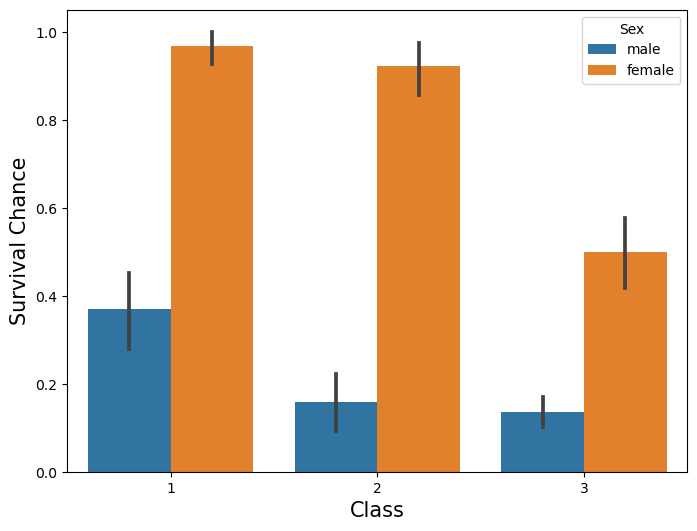

In [30]:
plt.subplots(figsize = (8,6))
sns.barplot('Pclass','Survived',data=train,hue='Sex')
plt.xlabel('Class',fontsize = 15)
plt.ylabel('Survival Chance',fontsize = 15)
plt.show()

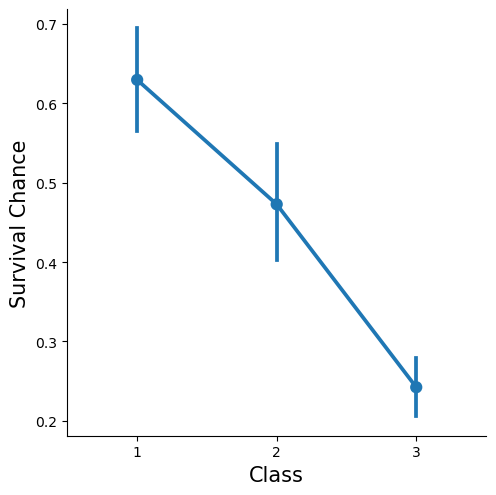

In [31]:
sns.catplot('Pclass','Survived', kind='point', data=train)
plt.xlabel('Class',fontsize = 15)
plt.ylabel('Survival Chance',fontsize = 15)
plt.show()

In [32]:
print("survivals chance in") 
print("Class 1 : ", train.Survived[train.Pclass == 1].sum()/train.Survived[train.Pclass == 1].count())
print("Class 2 : ", train.Survived[train.Pclass == 2].sum()/train.Survived[train.Pclass == 2].count())
print("Class 3 : ", train.Survived[train.Pclass == 3].sum()/train[train.Pclass == 3].Survived.count())

survivals chance in
Class 1 :  0.6296296296296297
Class 2 :  0.47282608695652173
Class 3 :  0.24236252545824846


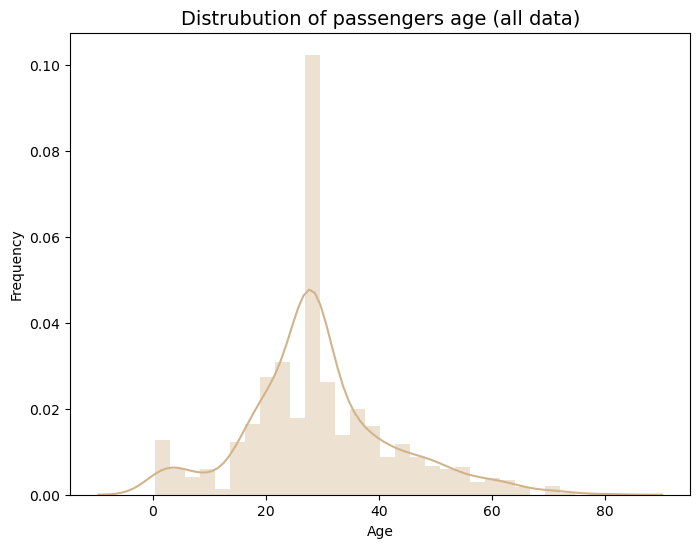

In [33]:
plt.subplots(figsize=(8,6))
sns.distplot(train.Age, color='tan')
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

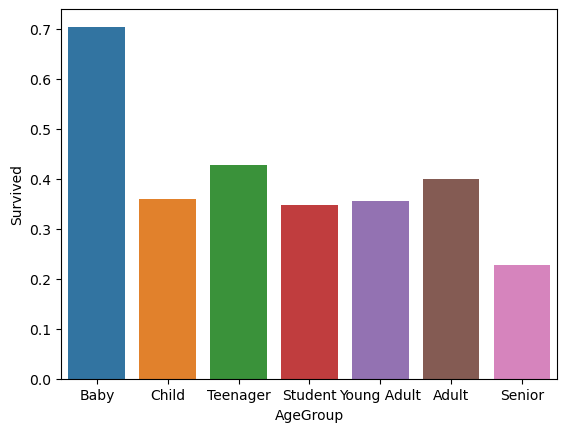

In [34]:
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
sns.barplot(x="AgeGroup", y="Survived", data=train,ci=None)
plt.show()

In [35]:
train.Name.tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [36]:
train['Title'] = train['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
test['Title'] = test['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')

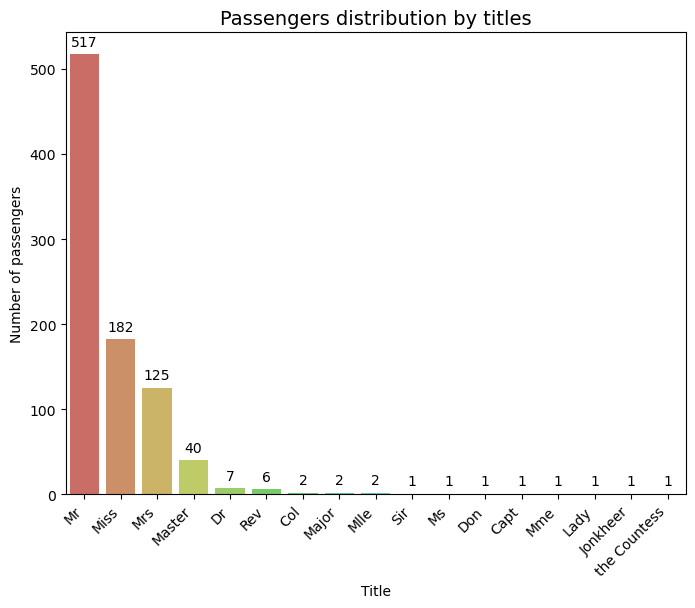

In [37]:
plt.figure(figsize=(8, 6))
ax = sns.countplot( x = 'Title', data = train, palette = "hls", order = train['Title'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (train['Title'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')

plt.show()

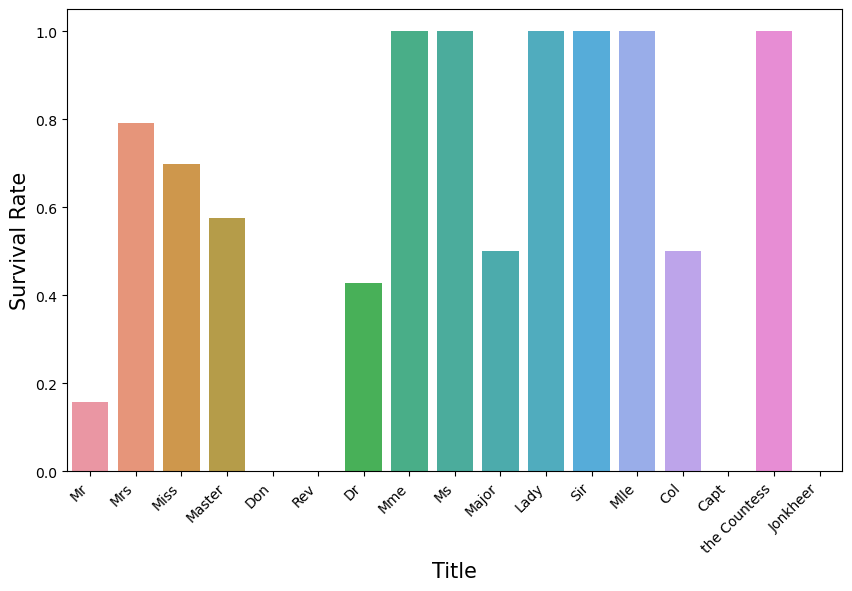

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Title", y="Survived", data=train,ci=None) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.xlabel('Title',size=15)
plt.ylabel('Survival Rate',size=15)
plt.show()

In [39]:
train['Cabin']

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [40]:
train['Cabin'].unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [41]:
train['deck']=train['Cabin'].str.split('',expand=True)[1]
test['deck']=test['Cabin'].str.split('',expand=True)[1]

In [42]:
train['deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

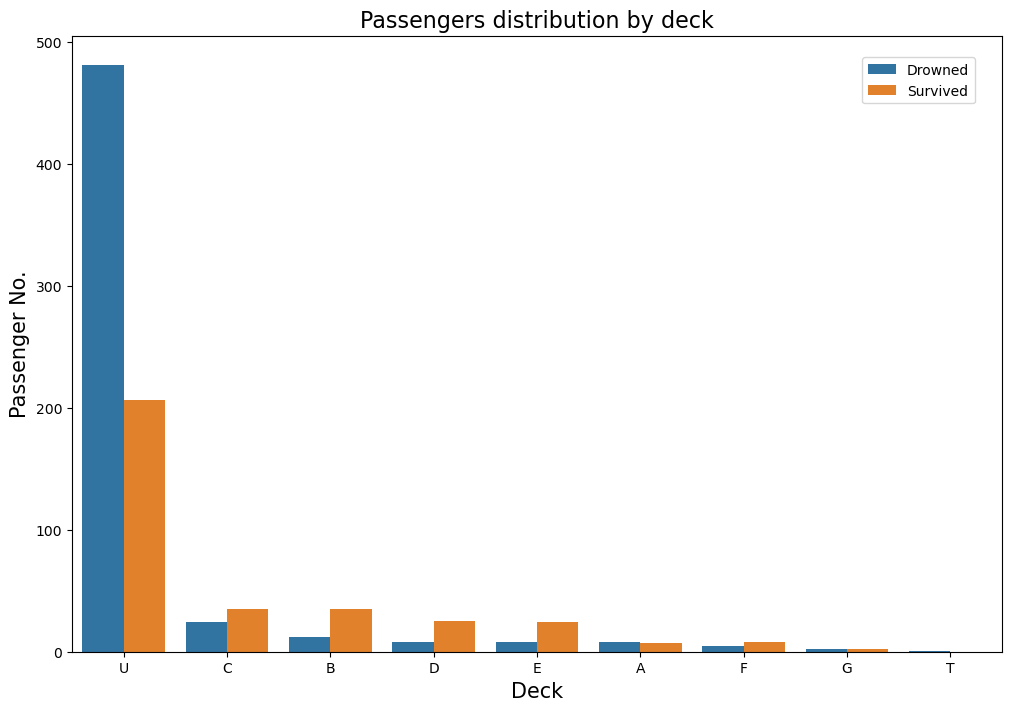

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x=train['deck'],data=train,hue='Survived',order = train['deck'].value_counts().index)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.xlabel('Deck',size=15)
plt.ylabel('Passenger No.', size=15)
plt.legend(( 'Drowned', 'Survived'), loc=(0.85,0.89))
plt.xticks(rotation = False)


plt.show()

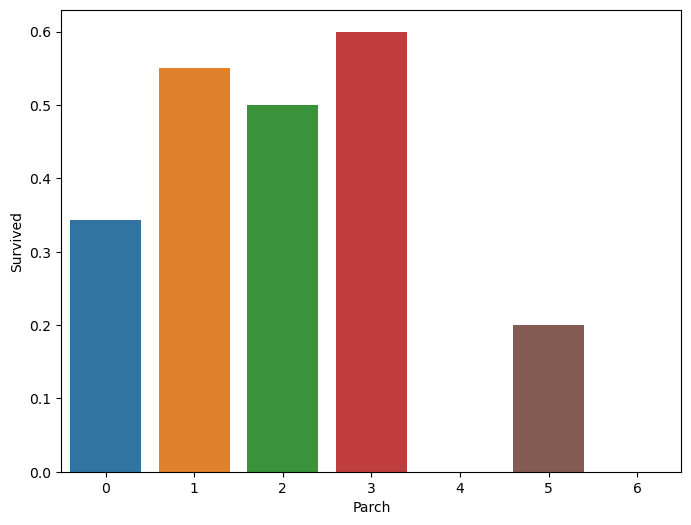

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x="Parch", y="Survived", data=train,ci=None)
plt.show()

In [45]:
train['SibSp'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [46]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

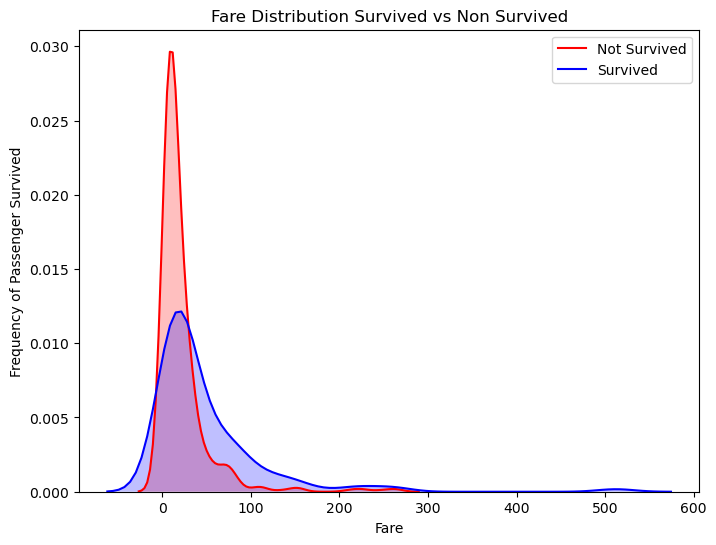

In [47]:
plt.subplots(figsize=(8,6))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived')
plt.ylabel('Frequency of Passenger Survived')
plt.xlabel('Fare')
plt.show()

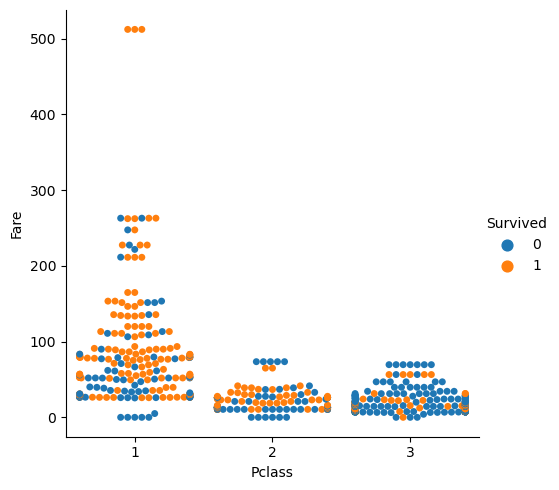

In [48]:
sns.catplot(x="Pclass", y="Fare",hue='Survived', kind="swarm", data=train)
plt.show()

In [49]:
train['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

In [50]:
train['Embarked'].describe()

count     891
unique      4
top         S
freq      644
Name: Embarked, dtype: object

In [51]:
train['Embarked'] = train['Embarked'].replace('Unknown','S')

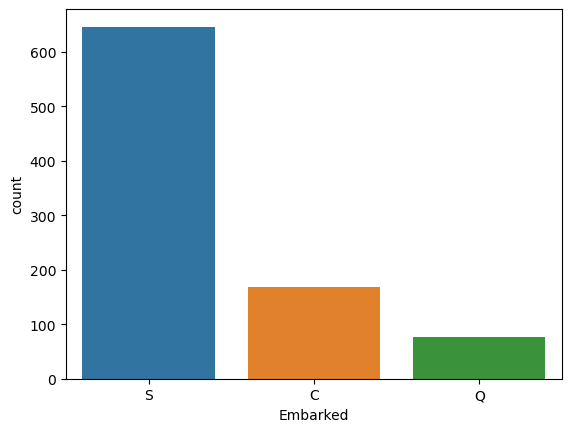

In [52]:
sns.countplot(train.Embarked)
labels = (train['Embarked'].value_counts())

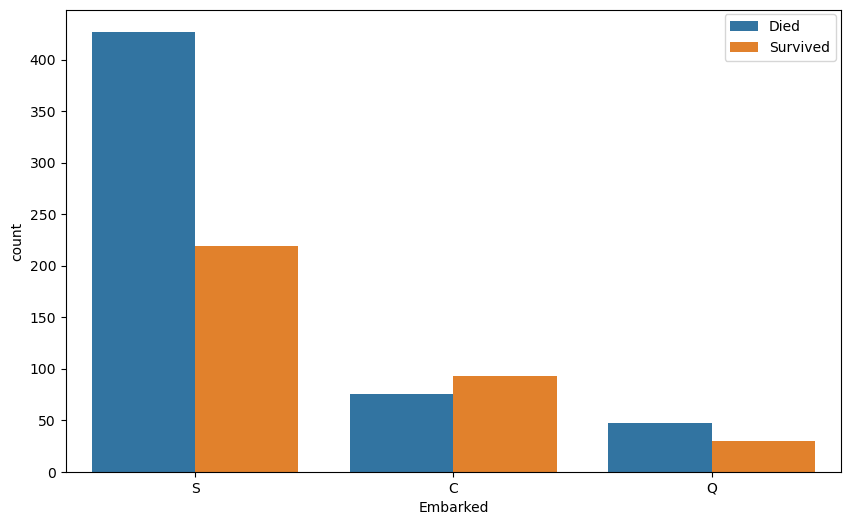

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(train['Embarked'],hue='Survived',data=train)
plt.legend(( 'Died', 'Survived'), loc=(0.85,0.89))
plt.show()

In [54]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,deck
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,Unknown,S,Young Adult,Rev,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Student,Miss,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,Unknown,S,Young Adult,Miss,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Young Adult,Mr,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Unknown,Q,Young Adult,Mr,U


## Feature

In [55]:
total_data=train.append(test)
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Student,Mr,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,Miss,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Young Adult,Mr,U


In [56]:
total_data.shape

(1309, 15)

## Adding New Features and filling the missing values

In [57]:
mapping = {'Mlle': 'Miss', 'Major': 'Rare', 'Col': 'Rare', 'Sir': 'Rare', 'Don': 'Rare', 'Mme': 'Mrs',
           'Jonkheer': 'Rare', 'Lady': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare', 'Ms': 'Miss', 'Dona': 'Mrs', 'Rev':'Rare', 'Dr':'Rare'}

total_data.replace({'Title': mapping}, inplace=True)

total_data['Title'].value_counts(normalize=True)*100

Mr              57.830405
Miss            20.168067
Mrs             15.202445
Master           4.660046
Rare             2.062643
the Countess     0.076394
Name: Title, dtype: float64

In [58]:
total_data['Title'] = total_data['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rare':4})
total_data['Title'].fillna(total_data['Title'].median(),inplace=True)

In [59]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
total_data['deck'] = total_data['deck'].map(cabin_category)

In [60]:
total_data['Family_size'] = total_data['SibSp'] + total_data['Parch'] + 1

In [61]:
total_data['Alone'] = 1
total_data['Alone'].loc[total_data['Family_size'] > 1] = 0

C:\Users\EzzZ\Anaconda3\envs\Py3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
bins = [-1, 0, 18, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
total_data['AgeGroup'] = pd.cut(total_data["Age"], bins, labels = labels)
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
total_data['AgeGroup'] = total_data['AgeGroup'].map(age_mapping)

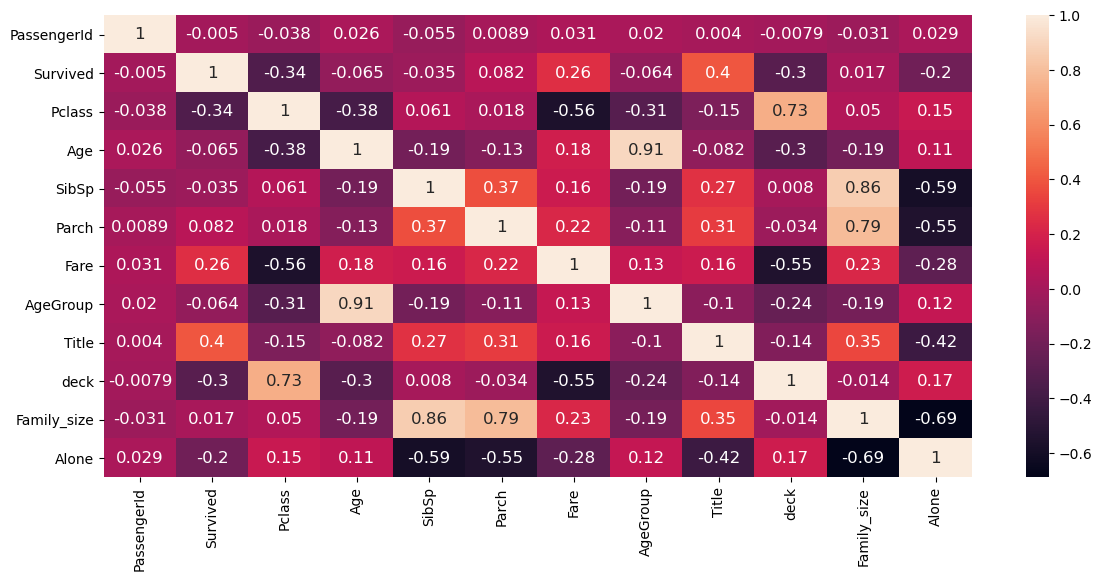

In [63]:
fig,ax=plt.subplots(figsize=(14,6))
sns.heatmap(total_data.corr(),annot=True,annot_kws={'size':12})

In [64]:
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,deck,Family_size,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2.0,0.0,9,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0,2.0,3,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,3.0,1.0,9,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,2.0,3,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,3.0,0.0,9,1,1


In [65]:
total_data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
AgeGroup         0
Title            0
deck             0
Family_size      0
Alone            0
dtype: int64

In [66]:
len(train)

891

In [67]:
len(test)

418

In [68]:
len(total_data)

1309